# Summary/Abstract

CIS 3330 
Instructor: Dr. Villacis Calderon


In this business analytics project, I am exploring the economy behavior in El Paso due to the COVID-19 Pandemic, and the long terms effects by using a mix of descriptive and predictive statistics. The objective is to figure out when and how the economy recovered and see what we can learn from it. I am using several metrics to measure the economy health, including population spending, COVID metrics (case rate and vaccine rate), employment numbers, mobility numbers, and job postings. A report derived from Checkpoint B is available in the repository and it contains the data cleaning aspect of the project. The following code and findings is specific to the analysis section based on the feedback for abstraction I received.   

# Descriptive Analytics: Correlation, ANOVA, Time-Series Plots

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
pd.options.mode.chained_assignment = None  # Removing an annoying warning

In [5]:
# Reading File
df = pd.read_csv("final_df.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23092 entries, 0 to 23091
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            23092 non-null  object 
 1   cityid              23092 non-null  int64  
 2   spend_all           17338 non-null  float64
 3   spend_inperson      17338 non-null  float64
 4   bg_posts            2979 non-null   float64
 5   new_case_rate       21936 non-null  float64
 6   new_vaccine_rate    10777 non-null  float64
 7   gps_away_from_home  18482 non-null  float64
 8   emp_incq1           23092 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 1.6+ MB


In [12]:
corr = df.loc[:, df.columns!='cityid'].corr(numeric_only=True) # using .loc to remove cityid, which is just an identifier, not a number

## Heatmap

<Axes: >

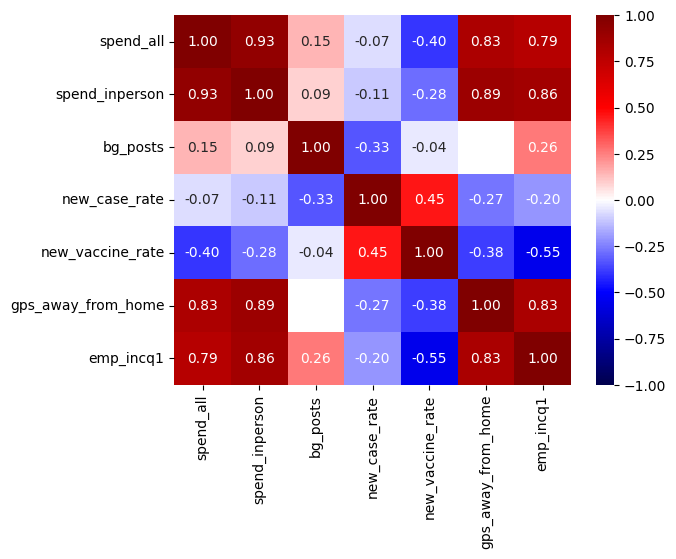

In [14]:
sns.heatmap(corr, annot=True, fmt='.2f', vmax=1, vmin=-1, cmap = 'seismic')

We can infer some interesting things from the heatmap. One is that there was a clear inverse relationship between spending and  vaccine rates, alluding that the severity of certain waves lessened desire or ability to spend more money. Similarly, there were less people being employed and people stayed more time at home when vaccine and cases rate were high. Finally, very strong positive correlations are observed between spending and employment rates & time away from home.   
White rectangles show NA correlation because dates where one was recorded, the other one wasn't.   

## Scatter Plots / Time Series

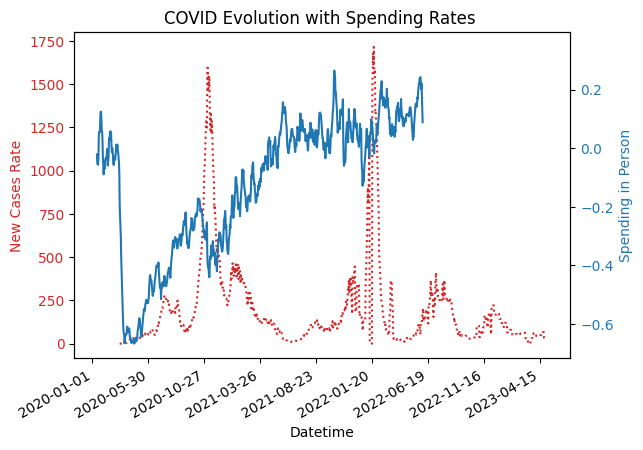

In [37]:
fig, ax1 = plt.subplots()

# First time series on the left y-axis
color = 'tab:red'
ax1.set_xlabel('Datetime')
ax1.set_ylabel('New Cases Rate', color=color)
ax1.plot(df['datetime'], df['new_case_rate'], linestyle='dotted', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis on the right for the second time series
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Spending in Person', color=color)
ax2.plot(df['datetime'], df['spend_inperson'], linestyle='solid', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title and formatting
plt.title('COVID Evolution with Spending Rates ')
plt.gcf().autofmt_xdate()
ax1.set_xticks(ax1.get_xticks()[::150])
plt.show()

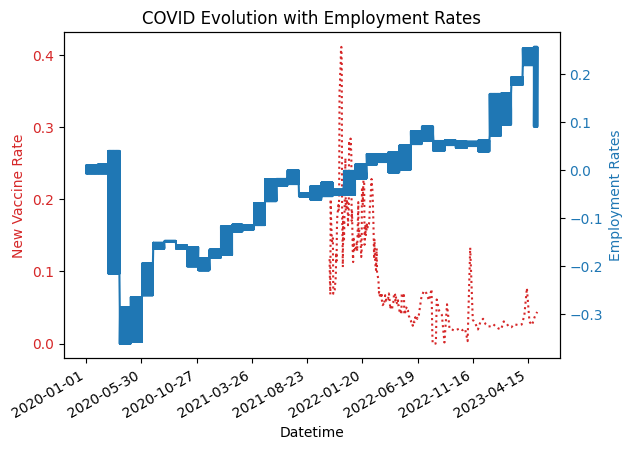

In [36]:
fig, ax1 = plt.subplots()

# First time series on the left y-axis
color = 'tab:red'
ax1.set_xlabel('Datetime')
ax1.set_ylabel('New Vaccine Rate', color=color)
ax1.plot(df['datetime'], df['new_vaccine_rate'], linestyle='dotted', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis on the right for the second time series
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Employment Rates', color=color)
ax2.plot(df['datetime'], df['emp_incq1'], linestyle='solid', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title and formatting
plt.title('COVID Evolution with Employment Rates')
plt.gcf().autofmt_xdate()
ax1.set_xticks(ax1.get_xticks()[::150])
plt.show()

In both of these time series, we can observe the inverse relationship between spending and employment compared to covid metrics. Notably, we see that because vaccines came midway through the pandemic, employment was returning to normal levels by then (2022). This explains the relatively strong negative correlation between them. 

## ANOVA

In [38]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [47]:
df_anova = df.dropna(subset=['spend_all', 'spend_inperson', 'new_case_rate', 'gps_away_from_home', 'emp_incq1'])

formula = 'spend_all ~  spend_inperson + new_case_rate + gps_away_from_home + emp_incq1'
model = ols(formula, df_anova).fit()

# Create the ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                       sum_sq       df             F         PR(>F)
spend_inperson      25.193188      1.0  12500.958671   0.000000e+00
new_case_rate        0.816310      1.0    405.056287   5.606730e-89
gps_away_from_home   1.055260      1.0    523.624278  4.779323e-114
emp_incq1            0.094119      1.0     46.702326   8.563602e-12
Residual            32.004987  15881.0           NaN            NaN


ANOVA Table shows that there is statistically significant evidence to say that COVID cases, time at home, and employment rates all affected spending. 

# Predictive Analytics: Linear Regression 